# Hyper Parameter Tuning

Since the initial learning rate of 0.01 (1e-2) was giving 7.77% accuracy on the activity validation and 65.69% for person validation, with a loss of 4.02, it can be said that our learning rate seems 'too high'. This is because when the accuracy is low and the loss is high, that either means that the data is untrainable or insufficient, or that the model is taking very big steps. It seems unlikely that the data is less, considering we have about 3600 images to train on in our case.

Hence, we shall try to do hyperparameter tuning to get the optimal learning rate for our model.

I wll be trying out 4 values for the learning rate. Since the results for 1e-2 are already 'bad' we do not need to test for higher rates. Therefore, I am tesing from 1e-5 till 1e-2 to get the minimum loss for the validaion dataset.

Below, I have decided to implement grid search to get the best hyperparameters. grid search would be useful here as we have less (4) iterations of training the model, so we can test out all the rates. I also considered using random search but because there are only 4 iterations, we can get a more in depth tuning with grid search.

In [ ]:
from sklearn.model_selection import ParameterGrid

# Define the range of learning rates to search
param_grid = {'learning_rate': [1e-5, 1e-4, 1e-3, 1e-2]}

# Perform grid search
best_lr = None
best_val_loss = float('inf')
for params in ParameterGrid(param_grid):
    lr = params['learning_rate']
    model = build_model(learning_rate=lr)
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=30, callbacks=get_callbacks(lr))
    val_loss = min(history.history['val_loss'])
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_lr = lr

print(f'Best learning rate: {best_lr}')

Epoch 1/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 87s 212ms/step - activity_output_accuracy: 0.0398 - loss: 31.9201 - person_output_accuracy: 0.5722 - val_activity_output_accuracy: 0.1569 - val_loss: 30.5676 - val_person_output_accuracy: 0.7056 - learning_rate: 1.0000e-05
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 32s 178ms/step - activity_output_accuracy: 0.1511 - loss: 30.4562 - person_output_accuracy: 0.6663 - val_activity_output_accuracy: 0.2986 - val_loss: 29.4920 - val_person_output_accuracy: 0.7514 - learning_rate: 9.0000e-06
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 32s 179ms/step - activity_output_accuracy: 0.2944 - loss: 29.3119 - person_output_accuracy: 0.7353 - val_activity_output_accuracy: 0.3903 - val_loss: 28.5790 - val_person_output_accuracy: 0.7681 - learning_rate: 8.1000e-06
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 32s 179ms/step - activity_output_accuracy: 0.4510 - loss: 28.2810 - person_output_accuracy: 0.7703 - val_activity_output_accuracy: 0.4597 - val_loss: 27.8284 - val_person_

Observations:


*   After the implemetation of grid search, we can see that our learning rate was indeed incorrect and was too high for this data.
*   We got the learning rate of 1e-4 as the most optimal.
*   We shall now trining our model with this rate but with more epochs as the rate still seemed to keep reducing the loss.



## Tuned Model

We shall now use the best learning rate derived from HyperParameter Tuning to train our model.

In [ ]:
lr = best_lr  # best learning rate

# Building the hyperparameter tuned model
model_tuned = build_model(learning_rate=lr)

# callbacks for new learning rate
callbacks = get_callbacks(lr)

# training the model
history = model_tuned.fit(train_dataset,
                    validation_data=val_dataset,
                    batch_size=16, epochs=80,
                    callbacks=callbacks
                    )

Epoch 1/80
180/180 ━━━━━━━━━━━━━━━━━━━━ 86s 200ms/step - activity_output_accuracy: 0.1705 - loss: 29.5572 - person_output_accuracy: 0.6490 - val_activity_output_accuracy: 0.5208 - val_loss: 23.1711 - val_person_output_accuracy: 0.7903 - learning_rate: 1.0000e-04
Epoch 2/80
180/180 ━━━━━━━━━━━━━━━━━━━━ 32s 178ms/step - activity_output_accuracy: 0.6757 - loss: 21.4071 - person_output_accuracy: 0.8132 - val_activity_output_accuracy: 0.6222 - val_loss: 18.3453 - val_person_output_accuracy: 0.8042 - learning_rate: 9.0000e-05
Epoch 3/80
180/180 ━━━━━━━━━━━━━━━━━━━━ 32s 178ms/step - activity_output_accuracy: 0.8766 - loss: 16.3988 - person_output_accuracy: 0.8946 - val_activity_output_accuracy: 0.6514 - val_loss: 15.0685 - val_person_output_accuracy: 0.7958 - learning_rate: 8.1000e-05
Epoch 4/80
180/180 ━━━━━━━━━━━━━━━━━━━━ 32s 179ms/step - activity_output_accuracy: 0.9386 - loss: 12.9365 - person_output_accuracy: 0.9537 - val_activity_output_accuracy: 0.6903 - val_loss: 12.3403 - val_person_

In [ ]:
predictions = model_tuned.predict(X_val) # make predictions on validation set

activity_predictions = predictions[0]
person_predictions = predictions[1]


23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step


**Loss**

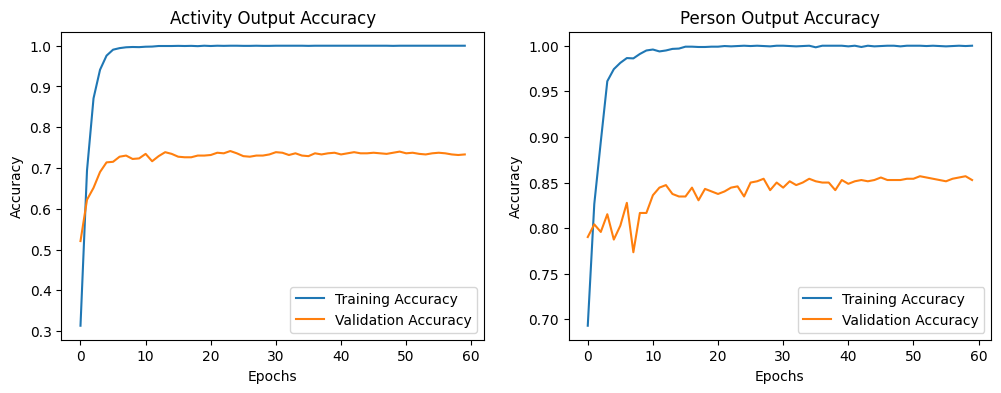

In [ ]:
# Plot the training and validation accuracy for activity output
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['activity_output_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_activity_output_accuracy'], label='Validation Accuracy')
plt.title('Activity Output Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the training and validation accuracy for person output
plt.subplot(1, 2, 2)
plt.plot(history.history['person_output_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_person_output_accuracy'], label='Validation Accuracy')
plt.title('Person Output Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


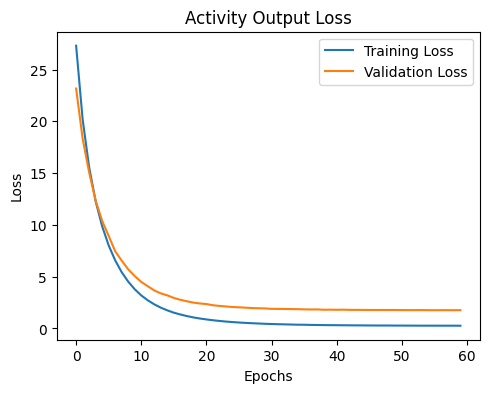

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss for activity output
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Activity Output Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Observations:


*   We can clearly see that the model performance has got much better as compared to our base model.
*   We are able to achieve a 73.75% accuracy on the `Class` predictions and 85.13% on `MoreThanOnePerson` with a Loss of 1.77 (rounded).
*   The Loss curve is much more smoth and stable as seen in the plots.
*   The model trains well with the accuracy increasing to almost 100% for both Activity, and Person outputs.
*  Looking at these results, the only issue that is see is that the model is still heavily overfitting.
* To avoid this, we can either reduce the number of epochs to stop early, or we can do data augmentation.
* I ahev tried try both ahead.

